In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import keras 
import tensorflow as tf

import numpy as np 
import pandas as pd

import cv2
import os

from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
# load json and create model
json_file = open('/Users/vineevineela/Downloads/Consumer_To_Shop/Model/model_cnn_semi.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [3]:
id_to_label = {}

id_to_label = {0: 'Chiffon', 1: 'Jeans', 2: 'Lace_Dress', 3: "Men's_Shirts", 4: 'Skirt'}

print(id_to_label)

{0: 'Chiffon', 1: 'Jeans', 2: 'Lace_Dress', 3: "Men's_Shirts", 4: 'Skirt'}


In [5]:
# Import Test Set , label is Coat

path_test = "/Users/vineevineela/Downloads/Consumer_To_Shop/Test_Integrate/Pant.jpg"
IMG_SIZE = 64
test_image = []
Categories_Predicted = 3

img = cv2.imread(path_test,cv2.IMREAD_COLOR)
img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
test_image.append(img)


In [6]:
test_image = np.array(test_image)
#test_label = np.array(test_label)
test_image.shape
#test_label.shape

(1, 64, 64, 3)

In [7]:
X_test = test_image
#Normalizing
X_test = X_test/255

(1, 64, 64, 3)


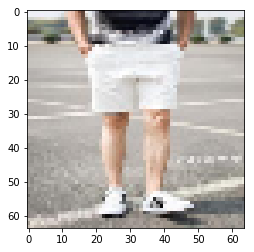

In [8]:
print(X_test.shape)
plt.imshow(X_test[0])

In [9]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [10]:
prob = loaded_model.predict(X_test)
l = prob.tolist()
prob_list = []
count = 0

for i in l:
    for j in i:
        prob_list.append((j,count))
        count = count+1

prob_list

[(0.3413991630077362, 0),
 (0.21605399250984192, 1),
 (0.030292721465229988, 2),
 (0.14781813323497772, 3),
 (0.2644359767436981, 4)]

In [11]:
# will be sorted in ascending order
prob_list = sorted(prob_list,reverse = True)
prob_list

[(0.3413991630077362, 0),
 (0.2644359767436981, 4),
 (0.21605399250984192, 1),
 (0.14781813323497772, 3),
 (0.030292721465229988, 2)]

In [12]:
# picking top n categories or you can put a threshold value to pick the catgeories
cat_pred = prob_list[:3]
print("cat_pred = ",cat_pred)

Y_pred_class = []

for i in cat_pred:
    Y_pred_class.append(id_to_label[i[1]])

Y_pred_class

cat_pred =  [(0.3413991630077362, 0), (0.2644359767436981, 4), (0.21605399250984192, 1)]


['Chiffon', 'Skirt', 'Jeans']